<a href="https://colab.research.google.com/github/revanthpavan/special-topics-linear-regression/blob/main/Linear_Regression_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as matplotlib
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.matrixlib.defmatrix import mat

In [61]:
numpy.random.seed(10) #setting seed for reproducable result

# Generate x data in the range of -3 to 3
x = numpy.random.uniform(-3, 3, 200)
x

array([ 1.62792386, -2.8754883 ,  0.80188941,  1.4928233 , -0.00895793,
       -1.65122013, -1.81162281,  1.56318427, -1.98533498, -2.46996111,
        1.11215891,  2.72036008, -2.9763104 ,  0.07315358,  1.87572577,
        0.6751564 ,  1.3305319 , -1.24874359,  2.50664474,  1.2874547 ,
        0.25526621, -2.14697971, -0.75995544,  1.04480169, -0.34900095,
       -0.39591604,  0.70660187,  0.07882946,  0.90238309,  0.60623372,
        1.83133918,  0.12988291,  2.45189328, -1.08458347, -2.4572439 ,
       -1.19579966, -2.31609383,  1.97208796, -2.71862208,  0.75772289,
        0.28551694,  1.91572197, -1.80631476,  2.14110181, -0.89008416,
        1.52788615, -1.22422976,  2.30361888, -1.04693017, -2.00990461,
       -0.64482454, -2.43923775,  1.92663395, -2.09308788, -0.69531331,
        2.66556427,  2.92575285, -0.26217272,  1.95673706, -1.49175519,
        0.58422989,  2.41699056,  0.20734769,  0.54120818, -2.7643094 ,
       -0.85690945, -2.52232146, -1.16724049, -1.01568413,  1.64

In [ ]:
noise = numpy.random.randn() #generating noise from the gaussian distribution

#Generating y data using x and injecting noise from the gaussian distribution
y = (0.75 * x) + 2*(x*x) + 1
y

In [63]:
df = pandas.DataFrame({'x':x, 'y':y})
#print(df.head())
#print(df.tail())
df

,x,y
0,1.627924,7.521215
1,-2.875488,15.380250
2,0.801889,2.887470
3,1.492823,6.576660
4,-0.008958,0.993442
...,...,...
195,-1.237011,3.132633
196,0.934360,3.446829
197,1.821410,9.001127
198,-0.892719,1.924355


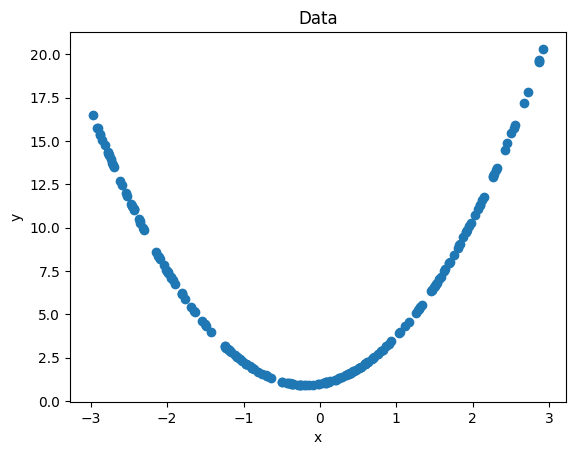

In [64]:
# Plot the data samples
matplotlib.scatter(x, y)
matplotlib.xlabel('x')
matplotlib.ylabel('y')
matplotlib.title('Data')
matplotlib.show()

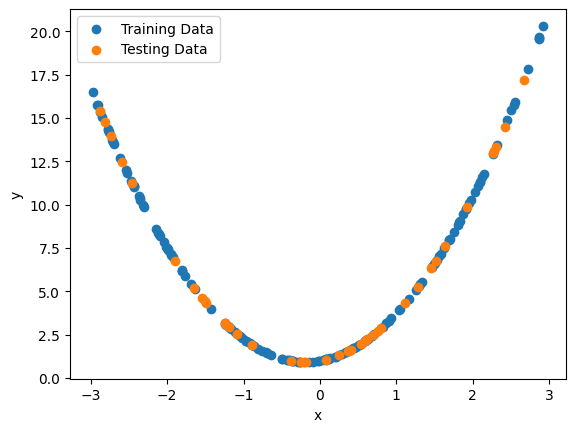

In [65]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=10)

#Ploting the test data and train data
matplotlib.scatter(x_train, y_train, label='Training Data')
matplotlib.scatter(x_test, y_test, label='Testing Data')
matplotlib.xlabel('x')
matplotlib.ylabel('y')
matplotlib.legend()
matplotlib.show()

In [66]:
#reshaping
x_train = x_train.reshape(-1,1)
x_test= x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

#x_train
#y_train
#x_test
#y_test

In [67]:
regression = linear_model.LinearRegression()
#training the model
regression.fit(x_train,y_train)
# Print the coefficients and intercept of the trained model
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficients: [[0.0767096]]
Intercept: [6.45372916]


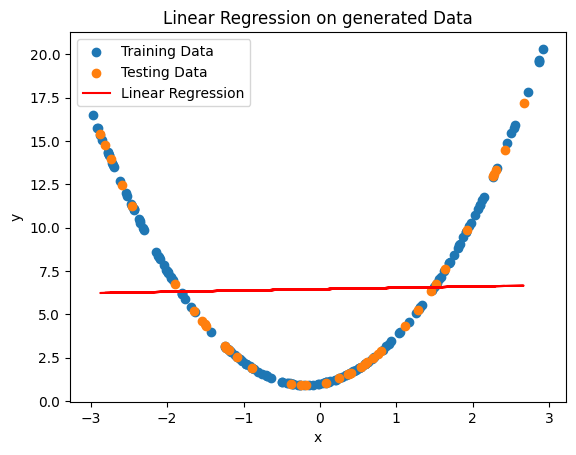

In [74]:
# Predict on the testing dataset
y_pred = regression.predict(x_test)

#graph
matplotlib.scatter(x_train, y_train, label='Training Data')
matplotlib.scatter(x_test, y_test, label='Testing Data')
matplotlib.plot(x_test, y_pred, color='red', label='Linear Regression')
matplotlib.xlabel('x')
matplotlib.ylabel('y')
matplotlib.title('Linear Regression on generated Data')
matplotlib.legend()
matplotlib.show()

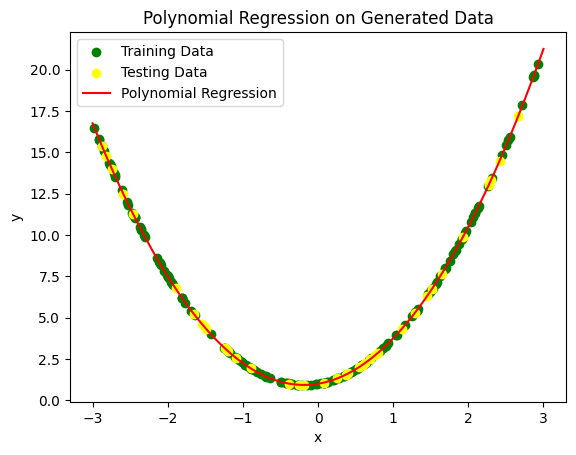

In [87]:
# Create polynomial features

poly_features = PolynomialFeatures(degree=2)  # Degree 2 for quadratic relationship
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Fit the model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Generate predictions using the fitted model
x_pred = numpy.linspace(-3, 3, 100).reshape(-1, 1)  # Generate 100 evenly spaced values between -3 and 3
x_pred_poly = poly_features.transform(x_pred)
y_pred_poly = poly_model.predict(x_pred_poly)

# Plot the predictions and ground truth
matplotlib.scatter(x_train, y_train, color = 'green',label='Training Data')
matplotlib.scatter(x_test, y_test, color = 'yellow', label='Testing Data')
matplotlib.plot(x_pred, y_pred_poly, color='red', label='Polynomial Regression')
matplotlib.xlabel('x')
matplotlib.ylabel('y')
matplotlib.title('Polynomial Regression on Generated Data')
matplotlib.legend()
matplotlib.show()